In [1]:
import pandas as pd
from google.colab import drive

In [27]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/tesis.xlsx'
df = pd.read_excel(file_path)
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Numero,Hora,Temp1,Hum1,Temp2,Hum2,Temp3,Hum3,TempAmbiente,HumedadAmbiente,Temp4,Hum4
0,16,2024-08-19 10:29:33,31.03,88.27,33.03,84.71,31.20,89.99,35.40,43.27,31.82,87.88
1,17,2024-08-19 10:29:47,31.03,88.31,33.03,84.69,31.23,89.99,35.54,43.27,31.83,87.88
2,18,2024-08-19 10:30:03,31.03,88.30,33.01,84.79,31.23,89.99,35.60,43.31,31.82,87.92
3,19,2024-08-19 10:30:18,31.05,88.27,32.98,84.80,31.23,89.99,35.71,43.27,31.82,87.92
4,20,2024-08-19 10:30:33,31.03,88.31,32.97,84.84,31.24,89.99,35.70,43.23,31.81,87.94


In [28]:
# Convertir la columna 'Hora' al formato datetime
df['Hora'] = pd.to_datetime(df['Hora'])

# Revisar si hay valores nulos
print(df.isnull().sum())



Numero             0
Hora               0
 Temp1             0
Hum1               0
Temp2              0
Hum2               0
Temp3              0
Hum3               0
TempAmbiente       0
HumedadAmbiente    0
Temp4              0
Hum4               0
dtype: int64


In [8]:
# Imprimir los nombres exactos de las columnas
print(df.columns)


Index(['Numero', 'Hora', ' Temp1', 'Hum1', 'Temp2', 'Hum2', 'Temp3', 'Hum3',
       'TempAmbiente', 'HumedadAmbiente', 'Temp4', 'Hum4'],
      dtype='object')


MSE: 1.14082006163826e-06
R²: 0.999999850805807


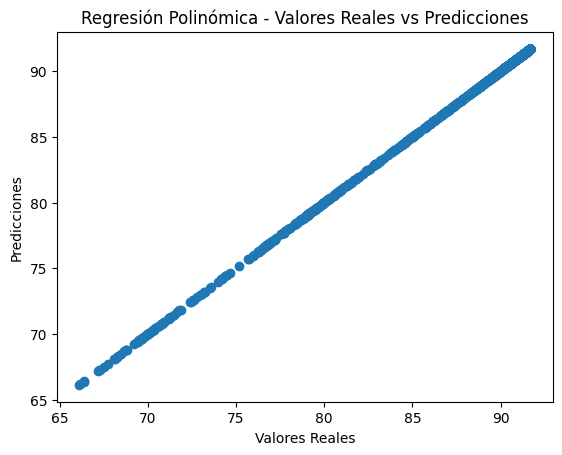

In [9]:
# Variables independientes (Temperaturas)
X = df[['Hum1', 'Hum2', 'Hum3', 'HumedadAmbiente']]

# Variable dependiente (Promedio de temperaturas)
y = df['Hum4']

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Crear las características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Ajustar un modelo de regresión lineal con las características polinómicas
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_poly_test)

from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Polinómica - Valores Reales vs Predicciones')
plt.show()


Numero             0
Hora               0
 Temp1             0
Hum1               0
Temp2              0
Hum2               0
Temp3              0
Hum3               0
TempAmbiente       0
HumedadAmbiente    0
Temp4              0
Hum4               0
dtype: int64
Index(['Numero', 'Hora', ' Temp1', 'Hum1', 'Temp2', 'Hum2', 'Temp3', 'Hum3',
       'TempAmbiente', 'HumedadAmbiente', 'Temp4', 'Hum4'],
      dtype='object')
Outliers según Z-score:
       Numero                Hora   Temp1   Hum1  Temp2   Hum2  Temp3   Hum3  \
10443   10459 2024-08-21 06:29:28   32.92  90.71  41.30  73.85  32.26  89.99   
10444   10460 2024-08-21 06:29:43   32.96  90.62  41.44  73.70  32.29  89.99   
10445   10461 2024-08-21 06:29:58   32.98  90.64  41.58  73.28  32.30  89.99   
10446   10462 2024-08-21 06:30:14   33.00  90.59  41.74  73.21  32.32  89.99   
10447   10463 2024-08-21 06:30:29   33.03  90.51  41.83  72.99  32.30  89.99   
...       ...                 ...     ...    ...    ...    ...    ...   

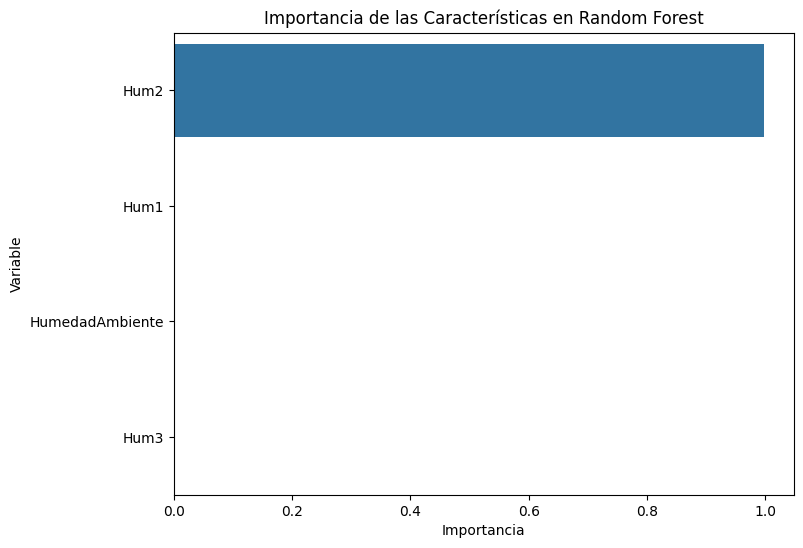

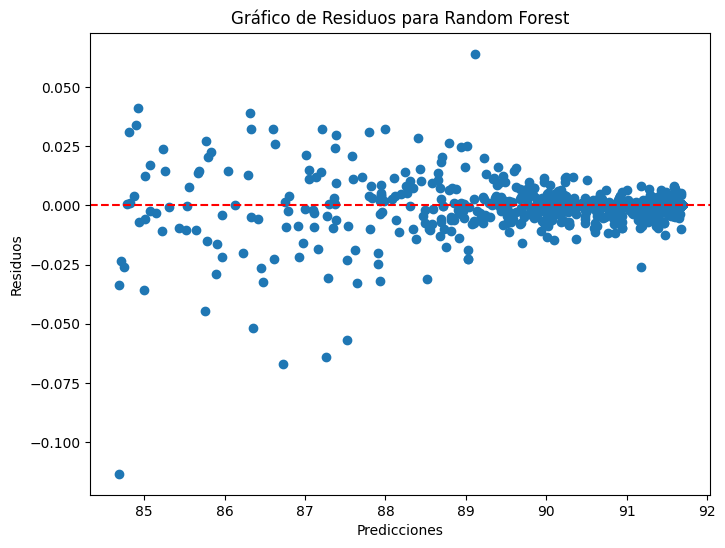

MSE promedio con validación cruzada: 0.0022902970280299167
Mejores parámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Correlación de Kendall:
                      Hum1      Hum2      Hum3      Hum4  HumedadAmbiente
Hum1             1.000000  0.609337 -0.007307  0.614130         0.203899
Hum2             0.609337  1.000000 -0.014486  0.979487         0.297766
Hum3            -0.007307 -0.014486  1.000000  0.141019        -0.021598
Hum4             0.614130  0.979487  0.141019  1.000000         0.287750
HumedadAmbiente  0.203899  0.297766 -0.021598  0.287750         1.000000


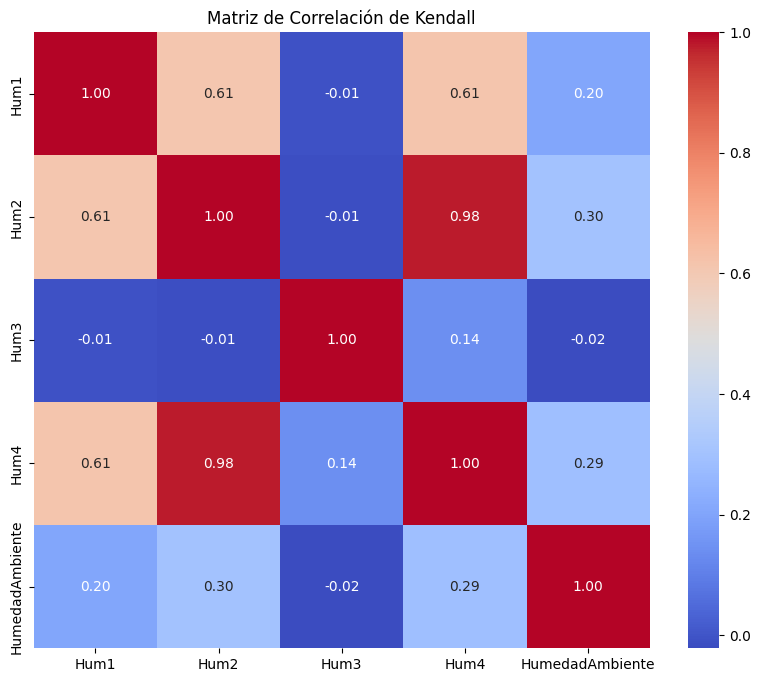

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import matplotlib.dates as mdates



# Convertir la columna 'Hora' al formato datetime
df['Hora'] = pd.to_datetime(df['Hora'])

# Revisar si hay valores nulos
print(df.isnull().sum())

# Imprimir los nombres exactos de las columnas
print(df.columns)

# Método Z-score para identificar outliers
z_scores = np.abs(stats.zscore(df[['Hum1', 'Hum2', 'Hum3', 'Hum4', 'HumedadAmbiente']]))
threshold = 3
outliers_zscore = df[(z_scores > threshold).any(axis=1)]

# Resultados de outliers
print("Outliers según Z-score:")
print(outliers_zscore)
print(f"Número de outliers según Z-score: {outliers_zscore.shape[0]}")

# Filtrar el DataFrame para eliminar los outliers
df_sin_outliers_zscore = df[~df.index.isin(outliers_zscore.index)]

# Variables independientes (Temperaturas)
X = df_sin_outliers_zscore[['Hum1', 'Hum2', 'Hum3', 'HumedadAmbiente']]

# Variable dependiente (Promedio de temperaturas)
y = df_sin_outliers_zscore['Hum4']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")

# Importancia de las características
importancia_rf = modelo_rf.feature_importances_
importancia_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importancia_rf})
print("Importancia de las características:\n", importancia_df)

# Visualizar la importancia de las características
plt.figure(figsize=(8, 6))
sns.barplot(x='Importancia', y='Variable', data=importancia_df.sort_values(by='Importancia', ascending=False))
plt.title('Importancia de las Características en Random Forest')
plt.show()

# Análisis de Errores
residuos = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Random Forest')
plt.show()

# Validación Cruzada
scores = cross_val_score(modelo_rf, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -scores.mean()
print(f"MSE promedio con validación cruzada: {mse_cv}")

# Ajuste de Hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f"Mejores parámetros: {grid_search.best_params_}")

# Correlación de Kendall
kendall_corr = df_sin_outliers_zscore[['Hum1', 'Hum2', 'Hum3', 'Hum4', 'HumedadAmbiente']].corr(method='kendall')
print("Correlación de Kendall:\n", kendall_corr)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación de Kendall')
plt.show()


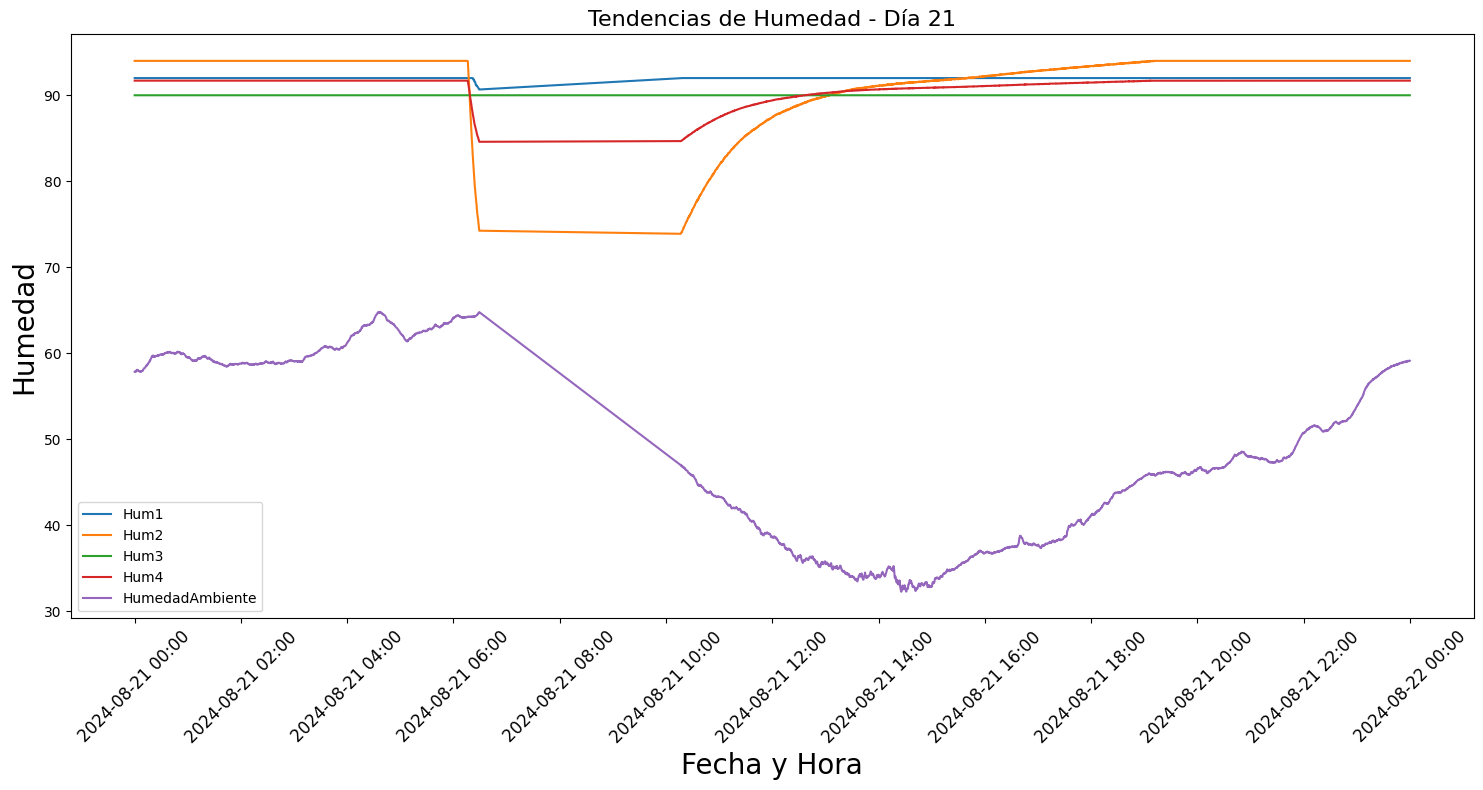

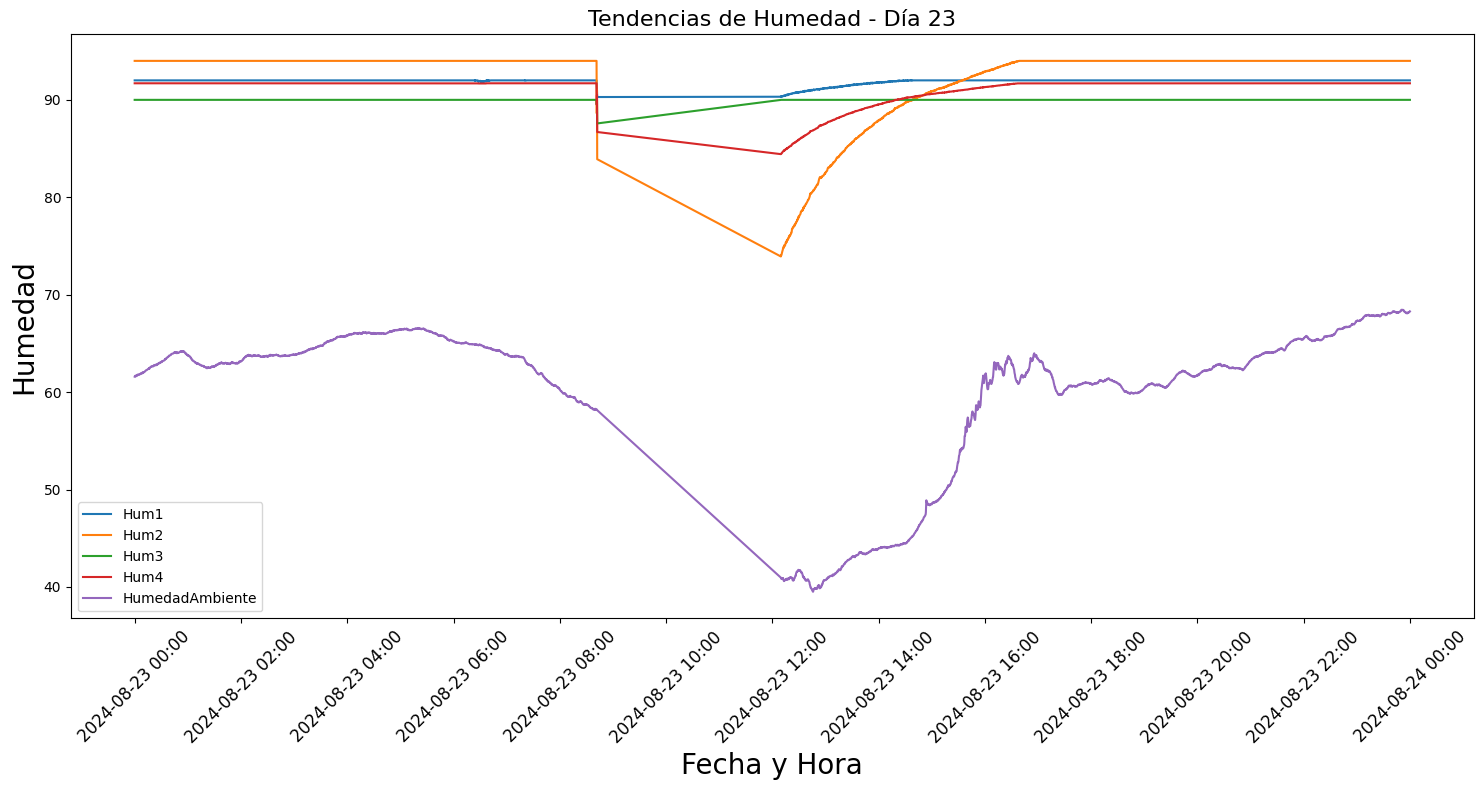

In [40]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Filtrar los datos para el día 21
df_dia_21 = df_sin_outliers_zscore[df_sin_outliers_zscore['Hora'].dt.day == 21]

# Filtrar los datos para el día 23
df_dia_23 = df_sin_outliers_zscore[df_sin_outliers_zscore['Hora'].dt.day == 23]

# Graficar el día 21
plt.figure(figsize=(15, 8))
plt.plot(df_dia_21['Hora'], df_dia_21['Hum1'], label='Hum1')
plt.plot(df_dia_21['Hora'], df_dia_21['Hum2'], label='Hum2')
plt.plot(df_dia_21['Hora'], df_dia_21['Hum3'], label='Hum3')
plt.plot(df_dia_21['Hora'], df_dia_21['Hum4'], label='Hum4')
plt.plot(df_dia_21['Hora'], df_dia_21['HumedadAmbiente'], label='HumedadAmbiente')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))

plt.xlabel('Fecha y Hora', fontsize=20)
plt.ylabel('Humedad', fontsize=20)
plt.title('Tendencias de Humedad - Día 21', fontsize=16)
plt.legend()
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Graficar el día 23
plt.figure(figsize=(15, 8))
plt.plot(df_dia_23['Hora'], df_dia_23['Hum1'], label='Hum1')
plt.plot(df_dia_23['Hora'], df_dia_23['Hum2'], label='Hum2')
plt.plot(df_dia_23['Hora'], df_dia_23['Hum3'], label='Hum3')
plt.plot(df_dia_23['Hora'], df_dia_23['Hum4'], label='Hum4')
plt.plot(df_dia_23['Hora'], df_dia_23['HumedadAmbiente'], label='HumedadAmbiente')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))

plt.xlabel('Fecha y Hora', fontsize=20)
plt.ylabel('Humedad', fontsize=20)
plt.title('Tendencias de Humedad - Día 23', fontsize=16)
plt.legend()
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-45-23d2f374ef52>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['HoraSegundos'] = (df_filtered['Hora'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


Área bajo la curva para Hum1 (5 am - 2 pm, día 21): 3122217.1050000004
Área bajo la curva para Hum2 (5 am - 2 pm, día 21): 2871984.225
Área bajo la curva para Hum3 (5 am - 2 pm, día 21): 3154343.99
Área bajo la curva para Hum4 (5 am - 2 pm, día 21): 3050701.19
Área bajo la curva para HumedadAmbiente (5 am - 2 pm, día 21): 1847794.645


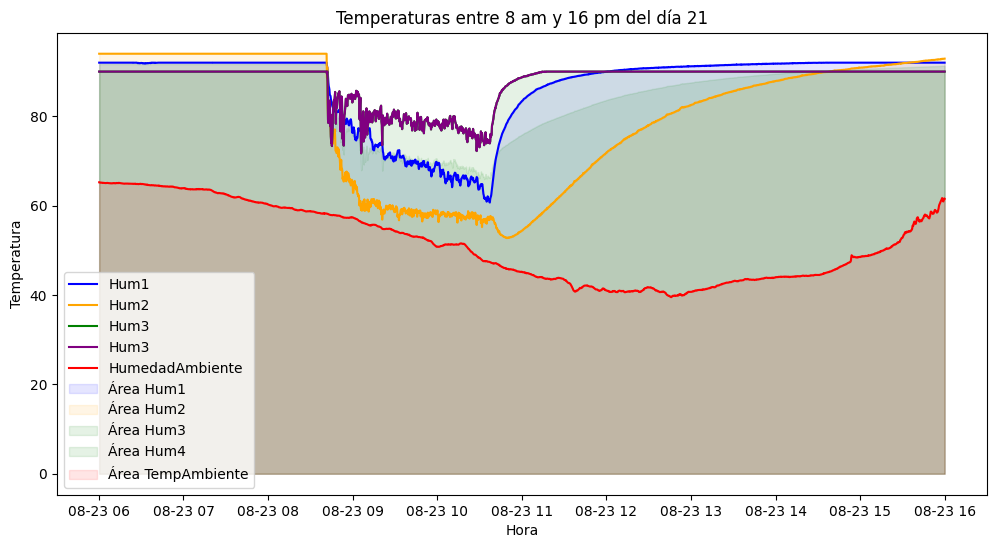

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/tesis.xlsx'
df = pd.read_excel(file_path)
df.head()

# Convertir la columna 'Hora' al formato datetime
df['Hora'] = pd.to_datetime(df['Hora'])

# Filtrar los datos para el día 21 entre 5:00 AM y 2:00 PM
start_time = pd.Timestamp(df['Hora'].dt.year.iloc[0], df['Hora'].dt.month.iloc[0], 23, 6, 0, 0)
end_time = pd.Timestamp(df['Hora'].dt.year.iloc[0], df['Hora'].dt.month.iloc[0], 23, 16, 0, 0)
df_filtered = df[(df['Hora'] >= start_time) & (df['Hora'] <= end_time)]

# Convertir la columna 'Hora' a segundos desde epoch (1970-01-01)
df_filtered['HoraSegundos'] = (df_filtered['Hora'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Calcular el área bajo la curva para cada sensor usando el método del trapecio en el rango de tiempo seleccionado
area_Hum1 = np.trapz(df_filtered['Hum1'], df_filtered['HoraSegundos'])
area_Hum2 = np.trapz(df_filtered['Hum2'], df_filtered['HoraSegundos'])
area_Hum3 = np.trapz(df_filtered['Hum3'], df_filtered['HoraSegundos'])
area_Hum4 = np.trapz(df_filtered['Hum4'], df_filtered['HoraSegundos'])
area_HumedadAmbiente = np.trapz(df_filtered['HumedadAmbiente'], df_filtered['HoraSegundos'])

# Resultados
print(f"Área bajo la curva para Hum1 (5 am - 2 pm, día 21): {area_Hum1}")
print(f"Área bajo la curva para Hum2 (5 am - 2 pm, día 21): {area_Hum2}")
print(f"Área bajo la curva para Hum3 (5 am - 2 pm, día 21): {area_Hum3}")
print(f"Área bajo la curva para Hum4 (5 am - 2 pm, día 21): {area_Hum4}")
print(f"Área bajo la curva para HumedadAmbiente (5 am - 2 pm, día 21): {area_HumedadAmbiente}")

# Graficar para visualizar
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Hora'], df_filtered['Hum1'], label='Hum1', color='blue')
plt.plot(df_filtered['Hora'], df_filtered['Hum2'], label='Hum2', color='orange')
plt.plot(df_filtered['Hora'], df_filtered['Hum3'], label='Hum3', color='green')
plt.plot(df_filtered['Hora'], df_filtered['Hum3'], label='Hum3', color='purple')
plt.plot(df_filtered['Hora'], df_filtered['HumedadAmbiente'], label='HumedadAmbiente', color='red')

# Rellenar el área bajo las curvas
plt.fill_between(df_filtered['Hora'], df_filtered['Hum1'], alpha=0.1, color='blue', label='Área Hum1')
plt.fill_between(df_filtered['Hora'], df_filtered['Hum2'], alpha=0.1, color='orange', label='Área Hum2')
plt.fill_between(df_filtered['Hora'], df_filtered['Hum3'], alpha=0.1, color='green', label='Área Hum3')
plt.fill_between(df_filtered['Hora'], df_filtered['Hum4'], alpha=0.1, color='green', label='Área Hum4')
plt.fill_between(df_filtered['Hora'], df_filtered['HumedadAmbiente'], alpha=0.1, color='red', label='Área TempAmbiente')

plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.title('Temperaturas entre 8 am y 16 pm del día 21')
plt.legend()
plt.show()
